#### **1. 아주 간단하면서도 제일 클라식하게 만들기**  
- 반복문을 통해 만든다.
- 이 방법을 통해 구현하면, 최대 n - 1번의 반복문을 돌게 된다.

In [1]:
def fibo_loop(n: int) -> int:
    
    if n < 0: return 0 # fibonacci 0
    
    recent, next_ = 0, 1
    for idx in range(1, n):
        
        recent, next_ = next_, recent + next_
    
    print(f'[{idx}]')
    return next_

fibo_loop(20)

[19]


6765

#### **2. 재귀적인 방법으로도 만들어보자**  
- 재귀적인 방법 (재귀 함수)는 함수 내에서 **자기 자신을 호출하는 함수**이다.
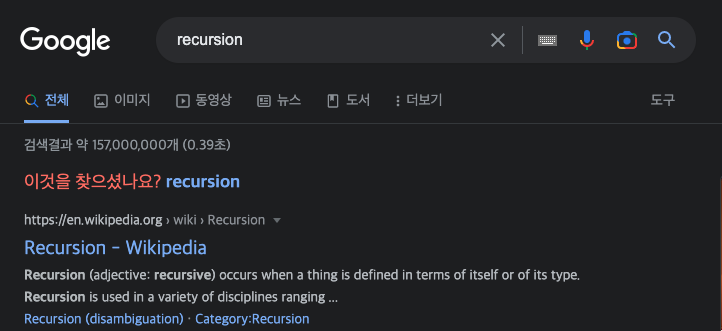
    - 구글의 유명 이스터 에그,, 저 이것을 찾으셨나요? 부분을 누르면 똑같은 페이지가 또 나온다..  


- 일단 아래의 코드로는 재귀함수를 빠져나오는 **기저 조건**을 설정하지 않아  
  **무한 반복**과 비슷한 **무한 재귀**가 발생한다.  
  
  
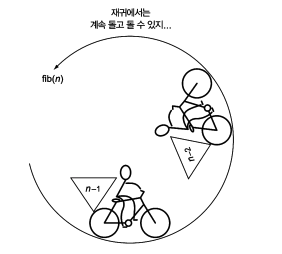

In [2]:
def fibo_recur1(n: int) -> int:
    
    return fibo_recur1(n - 2) + fibo_recur1(n - 1)

try: fibo_recur1(5)
except Exception as e: print(e)

maximum recursion depth exceeded


##### **2-1. 기저 조건을 추가해 만들어보자**
- 기저 조건을 추가하여, 우리의 재귀함수를 무한 재귀에서 구해주자.

In [3]:
class fibo:
    cnt = 0
    
    def fibo_recur(n : int) -> int:
        fibo.cnt += 1
        
        ## 기저 조건
        if n < 2: return n
        return fibo.fibo_recur(n - 2) + fibo.fibo_recur(n - 1)


f'{fibo.fibo_recur(20):,}', f'{fibo.cnt:,}'

('6,765', '21,891')

##### **2-2. 메모이제이션을 이용해 만들어보자**

- 분명 기저조건을 추가하여 무한재귀에서는 벗어났지만, 반복문을 통한 방법에 비해  
  굉장히 많은 횟수의 함수가 호출된다. (19 vs 21,891)
- 이런 호출 횟수를 줄이기 위해, 이전의 계산 결과를 저장하고 있는 **메모이제이션** 방법을 이용한다.  
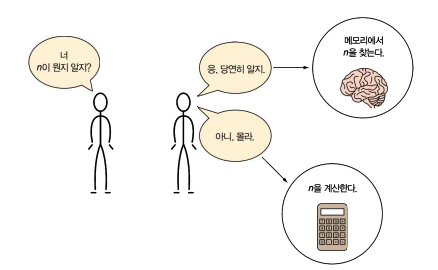

In [4]:
class fibo2:
        
    ## 초깃값 피보나치 수열의 0번째 1번째 항
    memo = {0 : 0, 1: 1}
    
    ## 호출 횟수 계산 용 변수
    cnt = 0

    def fibo_recur(n: int) -> int:
        
        if n not in fibo2.memo: 
            fibo2.memo[n] = fibo2.fibo_recur(n - 2) + fibo2.fibo_recur(n - 1)
        
        fibo2.cnt += 1
        return fibo2.memo[n]
    
fibo2.fibo_recur(20), fibo2.cnt

(6765, 39)

- 함수 호출 횟수는 압도적으로 줄어들었다.
- 이번에는 **lru_cache()** 라는 파이썬 내장모듈의 힘을 빌려보자.
  - lru_cache를 데코레이터 형태로 사용하면 함수의 반환값을 자동으로 메모이징 해준다.  
  - lru_cache 함수의 인자값으로 받은 maxsize는 가장 최근의 호출을 캐시(저장)할 수 있는  
    최대 크기이며, None은 캐시에 제한이 없다는 것이다.

In [5]:
from functools import lru_cache

@lru_cache(maxsize = None)
def fibo_recur2(n: int) -> int:
    
    if n < 2: return n
    return fibo_recur2(n - 2) + fibo_recur2(n - 1)

f'{fibo_recur2(270):,}'

'119,447,720,249,892,581,203,851,665,820,676,436,622,934,188,700,177,088,360'

##### **2-3. 제너레이터를 이용해 만들어보자**
- 제너레이터를 이해하기 위해서는 이터레이터에 대한 선수지식이 필요하다.
    - **이터레이터 (Iterator / 반복자)**
        - 값을 차례대로 꺼낼수 있는 객체(Object)
        - 파이썬에서는 이터레이터를 생성하고 값이 필요한 시점이 되었을 때 값을 생성하는데,    
          이를 지연 평가 (lazy evaluation)이라고 한다.  
          
    - **제너레이터 (Generator / 생성자)**
        - 이터레이터를 생성해주는 함수.
        - 일반 함수와는 달리 함수 호출시 yield 구문을 통해 반복 가능한 객체의 데이터를  
          필요 할 때만 불러와 준다.

In [6]:
from typing import Generator

def fibo_w_gen(n : int) -> Generator[int, None, None]:
    
    ## 피보나치 수열의 초항 
    yield 0
    if n > 1: yield 1
    
    recent: int = 0
    next_ : int = 1
    
    for _ in range(1, n):
        
        recent, next_ = next_, recent + next_
        yield next_

def fibo_loop(n: int) -> int:
    
    if n < 0: return 0 # fibonacci 0
    
    recent, next_ = 0, 1
    for idx in range(1, n):
        
        recent, next_ = next_, recent + next_
        return next_
    

## 제너레이터로 만들어낸 함수는 이전의 연산 값을 저장하고 있어
## 처음부터 계산하지 않고, 저장된 값 이후부터 연산된 결과값을 반환해준다.
print('--------제너레이터--------')
for idx in fibo_w_gen(20): print(idx)
print('------------------------\n')
print('--------일반  함수--------')
for _ in range(20): print(fibo_loop(20))
print('------------------------')

--------제너레이터--------
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
------------------------

--------일반  함수--------
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
------------------------
